<h1> Logistic Reg</h1> (for binary data)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
x,y = mnist['data'],mnist['target']

In [9]:
suf_idx = np.random.permutation(70000)
x,x[suf_idx],y,y[suf_idx] = x[suf_idx],x,y[suf_idx],y

In [10]:
x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]

binary modl for zero and nonZero

In [11]:
y_train_0 = (y_train==0)
y_test_0 = (y_test==0)

In [12]:
from sklearn.linear_model import SGDClassifier
#from sklearn.linear_model import LogisticRegression

In [13]:
sgd_clf = SGDClassifier(loss='log',random_state=0)
#clf_lr = LogisticRegression(C=1.0 , penalty='l2',tol=0.01)

In [14]:
sgd_clf.fit(x_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
y_predict = sgd_clf.predict(x_test)

In [16]:
np.where(y_predict!=y_test_0)

(array([  16,   38,   55,   67,  110,  127,  362,  439,  513,  573,  576,
         586,  650,  684,  784,  833,  847,  914,  974,  993, 1022, 1067,
        1104, 1137, 1213, 1217, 1257, 1414, 1419, 1438, 1456, 1495, 1533,
        1552, 1662, 1672, 1711, 1756, 1805, 1870, 1883, 1994, 2062, 2067,
        2068, 2086, 2091, 2124, 2208, 2239, 2254, 2282, 2288, 2290, 2396,
        2595, 2660, 2665, 2789, 2878, 2926, 3050, 3057, 3082, 3165, 3308,
        3315, 3367, 3414, 3479, 3517, 3541, 3566, 3665, 3845, 3849, 3944,
        3951, 4048, 4053, 4195, 4330, 4352, 4555, 4583, 4737, 4764, 4894,
        4896, 4930, 5005, 5152, 5275, 5278, 5296, 5368, 5369, 5382, 5494,
        5536, 5555, 5562, 5578, 5660, 5938, 5971, 6030, 6034, 6042, 6155,
        6158, 6159, 6239, 6279, 6341, 6366, 6376, 6485, 6562, 6707, 6720,
        6802, 6909, 6913, 6983, 6995, 7093, 7097, 7155, 7195, 7237, 7241,
        7242, 7249, 7254, 7373, 7498, 7514, 7582, 7592, 7681, 7801, 7994,
        8184, 8253, 8289, 8299, 8316, 

.....................................................
# Performance Measures

In [17]:
'''
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
sgd_clf = SGDClassifier(random_state=0)
'''
from sklearn.model_selection import cross_val_score

In [18]:
#skfolds = StratifiedKFold(n_splits=3,random_state=100)

In [19]:
'''
for train_idx,test_idx in skfolds.split(x_train,y_train_0):
    clone_clf = clone(sgd_clf)
    x_train_fold = x_train[train_idx]
    y_train_fold = (y_train_0[train_idx])
    x_test_fold = x_train[test_idx]
    y_test_fold = (y_train_0[test_idx])
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_predict_fold =clone_clf.predict(x_test_fold) 
    n_correct = sum(y_predict_fold==y_test_fold)
    print(n_correct/len(y_predict_fold))
'''
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.84853787, 0.85458546, 0.85077762])

.............................................
# Confusion Matrix

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [21]:
y_train_predict = cross_val_predict(sgd_clf,x_train,y_train_0,cv=3)

In [22]:
print('row -> y_train_0 : n0 and 0, col-> y_train_predict : n0 and 0\n')
print(confusion_matrix(y_train_0,y_train_predict))

row -> y_train_0 : n0 and 0, col-> y_train_predict : n0 and 0

[[53768   330]
 [  489  5413]]


### Precision

In [23]:
from sklearn.metrics import precision_score

In [24]:
precision_score(y_train_0,y_train_predict) # 5610 / (5610 + 399)

0.9425387428173428

### Recall

In [25]:
from sklearn.metrics import recall_score

In [26]:
recall_score(y_train_0,y_train_predict) # 5610 / (5610 + 305)

0.9171467299220604

### F1 Score

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_0,y_train_predict) # HM of recall and precision

0.9296693860025762

## Recall-Precision trade off

In [30]:
clf = SGDClassifier(loss='hinge',random_state=0)
clf.fit(x_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_scores = cross_val_predict(clf,x_train,y_train_0,cv=3,method='decision_function')

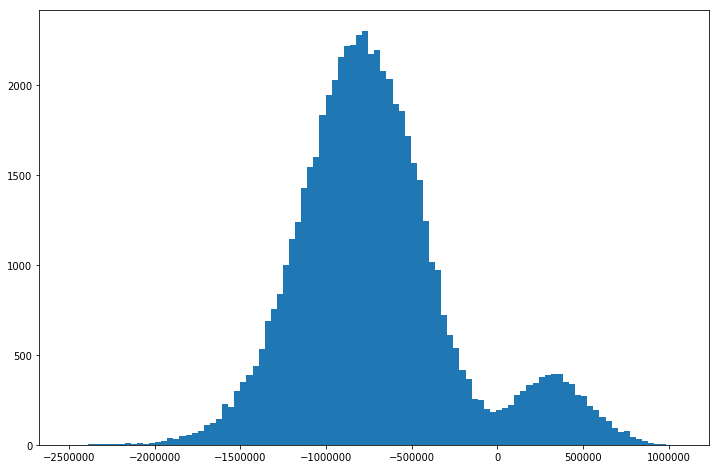

In [44]:
plt.figure(figsize=(12,8))
plt.hist(y_scores,bins=100)
plt.show()

In [46]:
from sklearn.metrics import precision_recall_curve

In [50]:
pre,rec,thresholds = precision_recall_curve(y_train_0,y_scores)

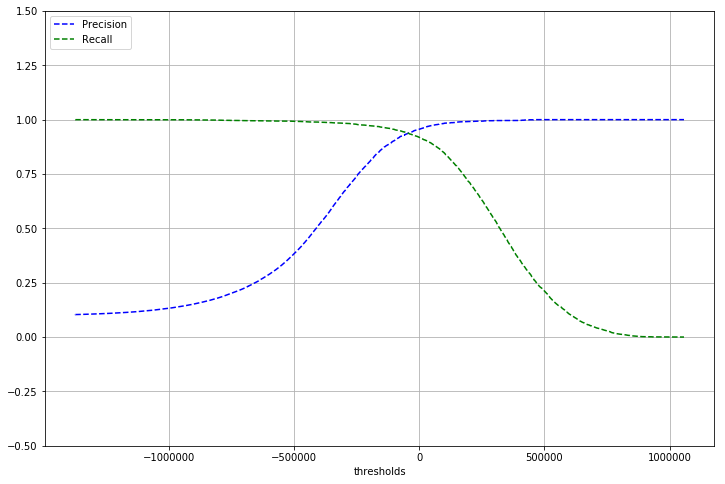

In [55]:
plt.figure(figsize=(12,8))
plt.plot(thresholds,pre[:-1],'b--',label='Precision')
plt.plot(thresholds,rec[:-1],'g--',label='Recall')
plt.xlabel('thresholds')
plt.ylim([-0.5,1.5])
plt.legend(loc='upper left')
plt.grid('on')
plt.show()

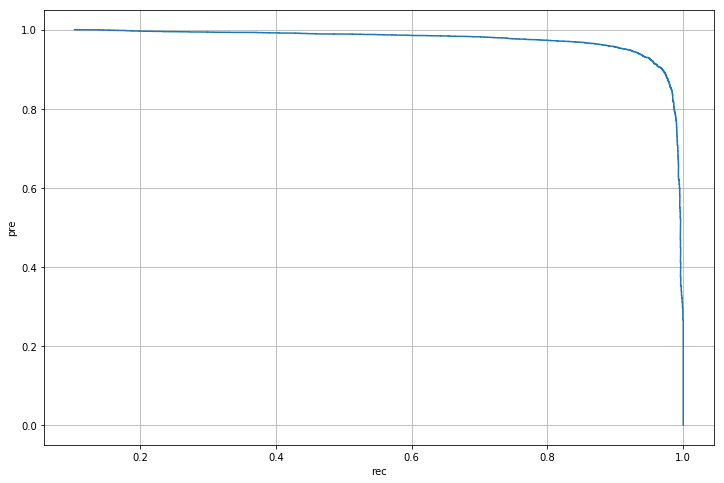

In [59]:
plt.figure(figsize=(12,8))
plt.plot(pre,rec)
plt.grid('on')
plt.xlabel('rec')
plt.ylabel('pre')
plt.show()

high pre

In [81]:
idx = len(pre[pre<0.99])

In [82]:
y_train_predict_90 = y_scores > int(thresholds[idx])

In [83]:
print('pre: ',precision_score(y_train_0,y_train_predict_90),'rec: ',recall_score(y_train_0,y_train_predict_90))

pre:  0.9901142355008787 rec:  0.7636394442561844


high rec

In [97]:
idx = len(rec[rec>0.99])

In [98]:
y_train_predict_90 = y_scores > int(thresholds[idx])

In [99]:
print('pre: ',precision_score(y_train_0,y_train_predict_90),'rec: ',recall_score(y_train_0,y_train_predict_90))

pre:  0.44973056197074673 rec:  0.9898339545916638


# The Receiver Operating Characteristics (ROC) Curve

In [100]:
from sklearn.metrics import roc_curve

In [101]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

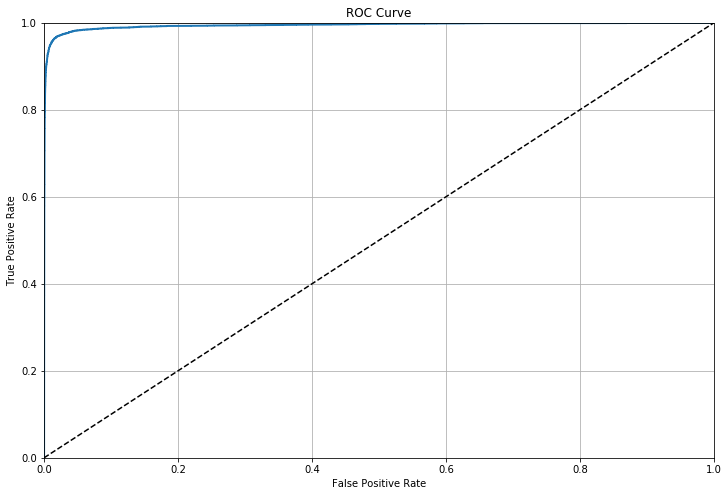

In [104]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid('on')
plt.show()

In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
roc_auc_score(y_train_0, y_scores)

0.9944560901367061